## Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

## Data Analysis

In [21]:
iot_ds2=pd.read_csv('IoT-DS2 final for testing.csv')
iot_ds2.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Bwd_IAT_Mean.1
0,6464587365,3232261270,64892,3232261123,80,6,1522984038,19377440,2,1,...,0.000000,0,0,9688720.000,1637865.780,10846866.0,8530574.0,Anomaly,DDoS,NaN
1,6464582463,3232261268,59992,3232261123,80,6,1522984039,22110440,3,1,...,0.000000,0,0,7370146.667,1734992.437,8413620.0,5367339.0,Anomaly,DDoS,NaN
2,6464566918,3232261269,44446,3232261123,80,17,1522987824,2851022,2,1,...,0.000000,0,0,0.000,0.000,0.0,0.0,Anomaly,DDoS,NaN
3,6464576412,3232261269,53936,3232261127,80,6,1522991862,16638411,3,5,...,0.000000,0,0,0.000,0.000,0.0,0.0,Anomaly,DDoS,NaN
4,6464578123,3232261270,55650,3232261123,80,6,1522984038,24702225,6,4,...,7354.617631,152124,141723,9614083.500,1938830.933,10985044.0,8243123.0,Anomaly,DDoS,NaN


In [22]:
iot_ds2.describe()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Bwd_IAT_Mean.1
count,6.305000e+04,6.305000e+04,63050.000000,6.305000e+04,63050.000000,63050.000000,6.305000e+04,6.305000e+04,63050.000000,63050.000000,...,63050.000000,6.305000e+04,6.305000e+04,6.305000e+04,6.305000e+04,6.305000e+04,6.305000e+04,6.305000e+04,6.305000e+04,0.0
mean,5.852817e+09,2.988531e+09,31382.639556,2.864239e+09,15387.362554,6.808247,1.551135e+09,9.822563e+06,15.237605,3.601887,...,19.477367,8.449633e+04,7.004583e+03,8.962307e+04,7.958526e+04,7.669687e+14,3.961708e+13,7.829483e+14,6.830378e+14,NaN
std,1.099323e+09,8.153823e+08,22378.924936,8.312951e+08,21276.959087,2.960299,2.128904e+07,2.096975e+07,1911.723394,12.067172,...,17.320720,7.547285e+05,1.511586e+05,7.788350e+05,7.461332e+05,7.656791e+14,1.549947e+14,7.794062e+14,7.722391e+14,NaN
min,1.368878e+08,2.998509e+07,0.000000,2.652447e+06,0.000000,0.000000,1.515381e+09,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,5.149832e+09,3.232236e+09,4433.000000,2.859002e+09,23.000000,6.000000,1.529271e+09,2.460000e+02,2.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,0.000000e+00,7.500000e+01,7.300000e+01,NaN
50%,6.464516e+09,3.232236e+09,38098.000000,3.232236e+09,554.000000,6.000000,1.551372e+09,1.220850e+05,4.000000,1.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.320000e+15,2.791654e+02,1.530000e+15,8.078056e+06,NaN
75%,6.464577e+09,3.232261e+09,51990.000000,3.232261e+09,37215.000000,6.000000,1.564025e+09,7.216902e+06,5.000000,3.000000,...,40.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+15,2.168371e+06,1.550000e+15,1.550000e+15,NaN
max,7.527167e+09,3.743907e+09,65526.000000,4.294898e+09,65535.000000,17.000000,1.626325e+09,1.199999e+08,339544.000000,328.000000,...,44.000000,1.433559e+07,5.989245e+06,1.433559e+07,1.433559e+07,1.626340e+15,1.096990e+15,1.626340e+15,1.626340e+15,NaN


In [23]:
iot_ds2.columns.tolist()

['Flow_ID',
 'Src_IP',
 'Src_Port',
 'Dst_IP',
 'Dst_Port',
 'Protocol',
 'Timestamp',
 'Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_PSH_Flags',
 'Bwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Down/Up_Ratio',
 'Pkt_Size_Avg',
 '

In [24]:
iot_ds2['Cat'].unique()

array(['DDoS', 'DoS', 'MITM ARP Spoofing', 'Mirai', 'MQQT_bruteforce',
       'Reconnaissance', 'Sparta', 'Theft', 'Normal', 'Attack', 'Torii',
       'PortScan', 'C&C', 'FileDownload', 'Flood', 'HeartBeat', 'Okiru'],
      dtype=object)

In [25]:
iot_ds2['Cat'].nunique()

17

In [26]:
iot_ds=iot_ds2.drop(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Src_Port'], axis=1)

In [27]:
x = iot_ds2.columns.tolist()
y = iot_ds2.select_dtypes(include=np.number).columns.tolist()
list(set(x)-set(y))

['Label', 'Cat']

In [28]:
Cat_map = {
    'Normal' : 0,
    'DDoS' : 1,
    'DoS' : 2,
    'MITM ARP Spoofing' : 3,
    'Mirai' : 4,
    'MQTT_bruteforce' : 5,
    'Sparta' : 6,
    'Theft' : 7,
    'Attack' : 8,
    'C&C' : 9,
    'FileDownload' : 10,
    'HeartBeat' : 11,
    'Okiru' : 12,
    'Reconnaissance' : 13,
    'Port Scan' : 14,
    'Torii' : 15,
    'Flood' : 16
}

In [29]:
iot_ds2_cat = iot_ds.drop(['Label'], axis=1)
cat_data = iot_ds2_cat['Cat'].map(Cat_map)
iot_ds2_cat['Cat'] = cat_data
print(iot_ds2_cat.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0        80         6       19377440             2             1   
1        80         6       22110440             3             1   
2        80        17        2851022             2             1   
3        80         6       16638411             3             5   
4        80         6       24702225             6             4   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0              200              100              100              100   
1              300              100              100              100   
2                0                0                0                0   
3              361             1124              361                0   
4              300              100              100                0   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0        100.000000  ...          0.0     0.000000           0           0

In [30]:
Label_map = {
    'Normal' : 0,
    'Anomaly' : 1
}

iot_ds2_label = iot_ds.drop(['Cat'], axis=1)
label_data = iot_ds2_label['Label'].map(Label_map)
iot_ds2_label['Label'] = label_data
print(iot_ds2_label.head())

   Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0        80         6       19377440             2             1   
1        80         6       22110440             3             1   
2        80        17        2851022             2             1   
3        80         6       16638411             3             5   
4        80         6       24702225             6             4   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0              200              100              100              100   
1              300              100              100              100   
2                0                0                0                0   
3              361             1124              361                0   
4              300              100              100                0   

   Fwd_Pkt_Len_Mean  ...  Active_Mean   Active_Std  Active_Max  Active_Min  \
0        100.000000  ...          0.0     0.000000           0           0

In [31]:
iot_ds2_cat.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Bwd_IAT_Mean.1
0,80,6,19377440,2,1,200,100,100,100,100.000000,...,0.0,0.000000,0,0,9688720.000,1637865.780,10846866.0,8530574.0,1.0,0.0
1,80,6,22110440,3,1,300,100,100,100,100.000000,...,0.0,0.000000,0,0,7370146.667,1734992.437,8413620.0,5367339.0,1.0,0.0
2,80,17,2851022,2,1,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1.0,0.0
3,80,6,16638411,3,5,361,1124,361,0,120.333333,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1.0,0.0
4,80,6,24702225,6,4,300,100,100,0,50.000000,...,146923.5,7354.617631,152124,141723,9614083.500,1938830.933,10985044.0,8243123.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63045,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,12.0,0.0
63046,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,12.0,0.0
63047,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,12.0,0.0
63048,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,12.0,0.0


In [32]:
iot_ds2_cat=iot_ds2_cat.drop_duplicates()
iot_ds2_cat=iot_ds2_cat.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds2_cat)

       Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0            80         6       19377440             2             1   
1            80         6       22110440             3             1   
2            80        17        2851022             2             1   
3            80         6       16638411             3             5   
4            80         6       24702225             6             4   
...         ...       ...            ...           ...           ...   
62546     37215         6            240             2             0   
62565     37215         6            237             2             0   
62792     37215         6             10             2             0   
62842     37215         6            234             2             0   
62962     37215         6            236             2             0   

       TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                  200              100              100  

In [33]:
iot_ds2_label.fillna(0)

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Bwd_IAT_Mean.1
0,80,6,19377440,2,1,200,100,100,100,100.000000,...,0.0,0.000000,0,0,9688720.000,1637865.780,10846866.0,8530574.0,1,0.0
1,80,6,22110440,3,1,300,100,100,100,100.000000,...,0.0,0.000000,0,0,7370146.667,1734992.437,8413620.0,5367339.0,1,0.0
2,80,17,2851022,2,1,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0
3,80,6,16638411,3,5,361,1124,361,0,120.333333,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0
4,80,6,24702225,6,4,300,100,100,0,50.000000,...,146923.5,7354.617631,152124,141723,9614083.500,1938830.933,10985044.0,8243123.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63045,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0
63046,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0
63047,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0
63048,37215,6,2,2,0,0,0,0,0,0.000000,...,0.0,0.000000,0,0,0.000,0.000,0.0,0.0,1,0.0


In [34]:
iot_ds_label=iot_ds2_label.drop_duplicates()
iot_ds_label=iot_ds_label.drop(['Bwd_IAT_Mean.1'], axis=1)
print(iot_ds_label)

       Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0            80         6       19377440             2             1   
1            80         6       22110440             3             1   
2            80        17        2851022             2             1   
3            80         6       16638411             3             5   
4            80         6       24702225             6             4   
...         ...       ...            ...           ...           ...   
62546     37215         6            240             2             0   
62565     37215         6            237             2             0   
62792     37215         6             10             2             0   
62842     37215         6            234             2             0   
62962     37215         6            236             2             0   

       TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  \
0                  200              100              100  

In [35]:
X = iot_ds2_cat.drop(['Cat'], axis=1)
X.shape
y=iot_ds2_cat['Cat']
y.shape

(59196,)

In [36]:
print(X.columns.isnull().sum())

0


In [37]:
X = X.astype(float)
print(X.dtypes)

Dst_Port         float64
Protocol         float64
Flow_Duration    float64
Tot_Fwd_Pkts     float64
Tot_Bwd_Pkts     float64
                  ...   
Active_Min       float64
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Length: 78, dtype: object


In [38]:
np.where(X.values >= np.finfo(np.float64).max)

(array([18449, 18449], dtype=int64), array([15, 16], dtype=int64))

In [39]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

## Data Normalization

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [41]:
X.head()

,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,-0.997559,-0.294118,-0.677042,-0.999988,-0.993902,-0.998057,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.961538,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
1,-0.997559,-0.294118,-0.631492,-0.999982,-0.993902,-0.997086,-0.999809,-0.996887,-0.984653,-0.993786,...,-0.942308,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
2,-0.997559,1.000000,-0.952483,-0.999988,-0.993902,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
3,-0.997559,-0.294118,-0.722693,-0.999982,-0.969512,-0.996493,-0.997857,-0.988761,-1.000000,-0.992522,...,-0.980769,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.0,-1.0,-1.0
4,-0.997559,-0.294118,-0.588296,-0.999965,-0.975610,-0.997086,-0.999809,-0.996887,-1.000000,-0.996893,...,-0.942308,-1.0,-0.979502,-0.997544,-0.978777,-0.980228,-1.0,-1.0,-1.0,-1.0


In [42]:
np.where(X.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [43]:
np.where(y.values >= np.finfo(np.float64).max)

(array([], dtype=int64),)

In [44]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [45]:
y[y==np.inf]=np.nan
y.fillna(0, inplace=True)

C:\Users\missu\AppData\Local\Temp\ipykernel_11480\2679510254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==np.inf]=np.nan


In [46]:
y_copy = y.copy()

# Replace np.inf with np.nan in the copy of y
y_copy[y_copy == np.inf] = np.nan

# Fill NaN values with 0 in the copy of y
y_copy.fillna(0, inplace=True)

### Splitting Data


In [47]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [48]:
y_train.head()

3652     1.0
22228    0.0
49902    0.0
30904    6.0
3610     1.0
Name: Cat, dtype: float64

### Features Extraction

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

forest = RandomForestClassifier()
_ = forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

rfe = RFE(forest, n_features_to_select=64)

# Define 5-fold cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Perform RFE with 5-fold cross-validation
scores = cross_val_score(rfe, X, y, cv=cv)

# Print mean score and standard deviation
print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))


0.9743243243243244
Accuracy: 0.977 (+/- 0.001)


In [50]:
pd.DataFrame(
    zip(X_train.columns, abs(forest.feature_importances_)),
    columns=["feature", "weight"],
).sort_values("weight").reset_index(drop=True)

,feature,weight
0,Fwd_Pkts/b_Avg,0.000000
1,Fwd_Blk_Rate_Avg,0.000000
2,ECE_Flag_Cnt,0.000006
3,Fwd_URG_Flags,0.000006
4,CWE_Flag_Count,0.000012
...,...,...
73,Flow_Pkts/s,0.034779
74,Flow_IAT_Mean,0.037953
75,Fwd_Header_Len,0.039072
76,Flow_Duration,0.039986


In [51]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# Init, fit
# scoring = ['accuracy', 'precision', 'recall', 'f1']
rfecv = RFECV(
    estimator=RandomForestClassifier(),
    min_features_to_select=64,
    n_jobs=-1,
    step=10,
    scoring='accuracy',
    cv=5
)

In [52]:
_ = rfecv.fit(X_train, y_train)

In [53]:
print(X_train.columns[rfecv.get_support()])

Index(['Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len',
       'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Fwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Subflow_Fwd_Pkts

In [54]:
# selected_features = X_train.columns[rfecv.get_support()]
# selected_features=selected_features.tolist()

In [55]:
n=64
feature_importance = _.estimator_.feature_importances_  # or coef_
feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

top_64_features = X_train.columns[top_n_idx]
top_64_features = top_64_features.tolist()
top_64_features

['CWE_Flag_Count',
 'Bwd_Blk_Rate_Avg',
 'Subflow_Fwd_Byts',
 'Fwd_PSH_Flags',
 'Subflow_Bwd_Byts',
 'Pkt_Len_Var',
 'Subflow_Fwd_Pkts',
 'ECE_Flag_Cnt',
 'Bwd_Pkt_Len_Std',
 'Down/Up_Ratio',
 'RST_Flag_Cnt',
 'Bwd_Header_Len',
 'TotLen_Bwd_Pkts',
 'URG_Flag_Cnt',
 'FIN_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkt_Len_Std',
 'Pkt_Len_Mean',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Protocol',
 'Bwd_Pkt_Len_Mean',
 'Bwd_IAT_Std',
 'Pkt_Size_Avg',
 'Pkt_Len_Max',
 'Fwd_Pkt_Len_Max',
 'Flow_IAT_Std',
 'Fwd_IAT_Min',
 'Bwd_IAT_Min',
 'Fwd_Seg_Size_Avg',
 'Fwd_Pkt_Len_Mean',
 'TotLen_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'Flow_Byts/s',
 'Bwd_URG_Flags',
 'Init_Bwd_Win_Byts',
 'Bwd_Pkts/s',
 'ACK_Flag_Cnt',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Max',
 'Bwd_IAT_Tot',
 'PSH_Flag_Cnt',
 'Bwd_IAT_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkts/s',
 'Flow_IAT_Min',
 'Fwd_IAT_Std',
 'Pkt_Len_Min',
 'Bwd_IAT_Mean',
 'SYN_Flag_Cnt',
 'Subflow_Bwd_Pkts',
 'Bwd_Pkts/b_Avg',
 'Fwd_IAT_Mean',
 'Fwd_URG_Flags',
 'Fwd_Head

In [56]:
features_removed=(set(X_train.columns)-set(top_64_features))
features_removed

{'Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Bwd_PSH_Flags',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Std'}

In [57]:
features_to_be_dropped=['Active_Max',
 'Active_Mean',
 'Active_Min',
 'Active_Std',
 'Flow_IAT_Max',
 'Fwd_Act_Data_Pkts',
 'Fwd_Pkts/b_Avg',
 'Fwd_Seg_Size_Min',
 'Idle_Max',
 'Idle_Mean',
 'Idle_Min',
 'Idle_Std',
 'Init_Fwd_Win_Byts',
 'Pkt_Len_Mean']

In [58]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Multiclass Classification

In [61]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LayerNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', padding='same', input_shape=(64, 1)))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same'))
model.add(LayerNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.05))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(units=17, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Remove .values attribute
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [62]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(35517, 64, 1)
(11840, 64, 1)
(11839, 64, 1)


In [63]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = model.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(35517, 64, 1)
Epoch 1/25


1110/1110 [==============================] - 68s 56ms/step - loss: 0.7654 - accuracy: 0.7597 - val_loss: 0.3346 - val_accuracy: 0.9115
Epoch 2/25
1110/1110 [==============================] - 70s 63ms/step - loss: 0.3529 - accuracy: 0.8938 - val_loss: 0.2494 - val_accuracy: 0.9301
Epoch 3/25
1110/1110 [==============================] - 61s 55ms/step - loss: 0.2804 - accuracy: 0.9136 - val_loss: 0.2119 - val_accuracy: 0.9337
Epoch 4/25
1110/1110 [==============================] - 51s 46ms/step - loss: 0.2431 - accuracy: 0.9241 - val_loss: 0.2074 - val_accuracy: 0.9387
Epoch 5/25
1110/1110 [==============================] - 41s 37ms/step - loss: 0.2199 - accuracy: 0.9296 - val_loss: 0.1816 - val_accuracy: 0.9405
Epoch 6/25
1110/1110 [==============================] - 58s 53ms/step - loss: 0.2003 - accuracy: 0.9344 - val_loss: 0.1586 - val_accuracy: 0.9379
Epoch 7/25
1110/1110 [==============================] - 78s 70ms/step - loss: 0.1806 - accuracy: 0.9401 - v

In [65]:
model.save('CNN1D.keras')

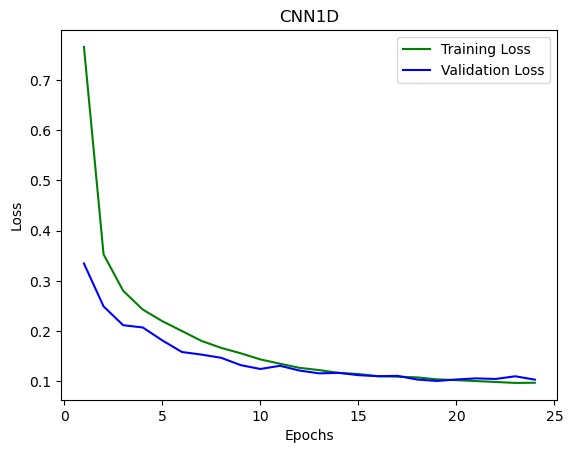

In [68]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(train_loss)
plt.plot(range(1, epochs + 1), train_loss, 'g', label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

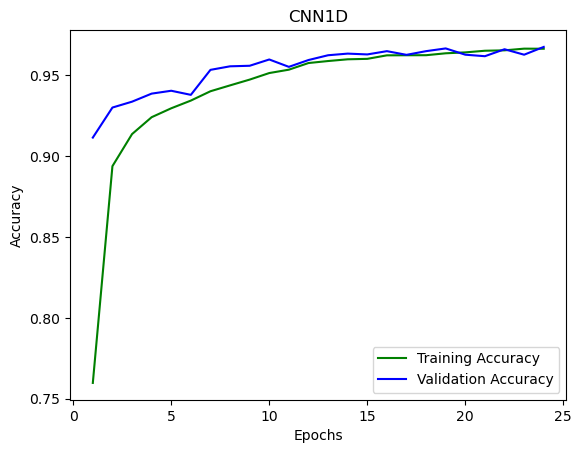

In [69]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = len(train_loss)
plt.plot(range(1, epochs + 1), train_acc, 'g', label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, 'b', label='Validation Accuracy')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [70]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

370/370 [==============================] - 4s 9ms/step


In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 96.60

Precision: 96.86
Recall: 96.60
F1-score: 96.59



In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[2979    0    1    0    0    4    1    8    4    0    0    0    0    5
     0]
 [   0  999    0    0    0    0    0    0    0    0    0    0    1    0
     0]
 [   0    0  989    7    2    0    0    0    0    0    0    0    2    0
     0]
 [   1    0    0  974   23    0    0    0    0    0    0    0    2    0
     0]
 [   1    0    0  205  791    0    0    0    0    0    0    0    2    0
     0]
 [   3    0    0    0    0  992    4    0    0    0    0    0    0    1
     0]
 [   3    0    0    0    0    2  992    0    0    1    0    0    0    2
     0]
 [   0    0    0    0    0    0    0  978    3    0    0    0    0   11
     0]
 [  30    0    0    0    0    0    0    4  160    1    0    0    0    0
     0]
 [   5    0    0    0    0    0    0    0   20  172    2    1    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    9  188    1    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    1    3    0    0
     0]
 [   0    1   16    2    0    0    0    

In [74]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [75]:
np.unique(y_pred_classes)

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16],
      dtype=int64)

In [76]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.98      0.99      0.99      3002
             DDoS       1.00      1.00      1.00      1000
              DoS       0.98      0.99      0.99      1000
MITM ARP Spoofing       0.82      0.97      0.89      1000
            Mirai       0.97      0.79      0.87       999
           Sparta       0.99      0.99      0.99      1000
            Theft       0.99      0.99      0.99      1000
           Attack       0.98      0.99      0.98       992
              C&C       0.85      0.82      0.84       195
     FileDownload       0.94      0.86      0.90       200
        HeartBeat       0.98      0.95      0.97       198
            Okiru       0.60      0.75      0.67         4
   Reconnaissance       0.99      0.98      0.99      1000
            Torii       0.69      0.81      0.74        52
            Flood       1.00      1.00      1.00       198

         accuracy                           0.97     1

In [77]:
num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.994172,2979.0,8792.0,46.0,23.0
1,DDoS,0.999831,999.0,10839.0,1.0,1.0
2,DoS,0.997635,989.0,10823.0,17.0,11.0
3,MITM ARP Spoofing,0.979730,974.0,10626.0,214.0,26.0
4,Mirai,0.980321,791.0,10816.0,25.0,208.0
5,Sparta,0.998818,992.0,10834.0,6.0,8.0
6,Theft,0.998902,992.0,10835.0,5.0,8.0
7,Attack,0.997297,978.0,10830.0,18.0,14.0
8,C&C,0.994679,160.0,11617.0,28.0,35.0
9,FileDownload,0.996706,172.0,11629.0,11.0,28.0


# CNN 2D model training

In [78]:
cnn2d = Sequential()
cnn2d.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', padding='same', input_shape=(8, 8, 1)))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(AveragePooling2D())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'))
cnn2d.add(LayerNormalization())
cnn2d.add(layers.SpatialDropout2D(0.05))
cnn2d.add(Flatten())
cnn2d.add(Dense(512, activation='relu'))
cnn2d.add(Dense(units=17, activation='softmax'))

cnn2d.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)

X_val = X_val.reshape(X_val.shape[0],  8, 8, 1)

X_test = X_test.reshape(X_test.shape[0],  8, 8, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 64))

In [79]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(35517, 8, 8, 1)
(11840, 8, 8, 1)
(11839, 8, 8, 1)


In [80]:
from keras.callbacks import EarlyStopping
print(X_train.shape)
history = cnn2d.fit(X_train, y_train, epochs=25, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(35517, 8, 8, 1)
Epoch 1/25
1110/1110 [==============================] - 94s 80ms/step - loss: 0.9127 - accuracy: 0.7053 - val_loss: 0.3600 - val_accuracy: 0.8637
Epoch 2/25
1110/1110 [==============================] - 99s 90ms/step - loss: 0.3524 - accuracy: 0.8926 - val_loss: 0.2637 - val_accuracy: 0.9235
Epoch 3/25
1110/1110 [==============================] - 73s 66ms/step - loss: 0.2810 - accuracy: 0.9152 - val_loss: 0.2670 - val_accuracy: 0.9088
Epoch 4/25
1110/1110 [==============================] - 83s 74ms/step - loss: 0.2517 - accuracy: 0.9220 - val_loss: 0.2132 - val_accuracy: 0.9318
Epoch 5/25
1110/1110 [==============================] - 81s 73ms/step - loss: 0.2368 - accuracy: 0.9260 - val_loss: 0.1973 - val_accuracy: 0.9399
Epoch 6/25
1110/1110 [==============================] - 76s 69ms/step - loss: 0.2246 - accuracy: 0.9281 - val_loss: 0.1995 - val_accuracy: 0.9394
Epoch 7/25
1110/1110 [==============================] - 77s 70ms/step - loss: 0.2122 - accuracy: 0.9323 - v

In [83]:
cnn2d.save('CNN2D.hdf5')

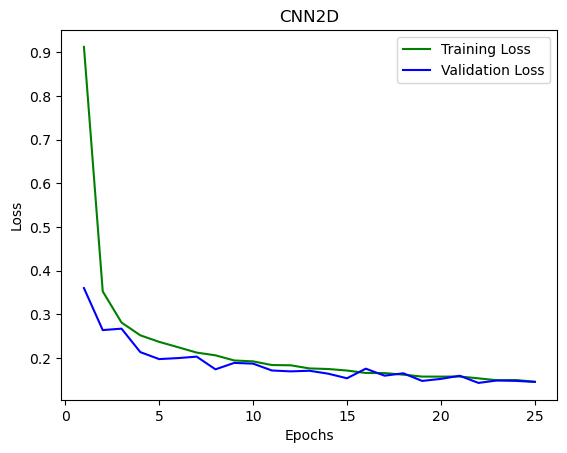

In [84]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 26)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

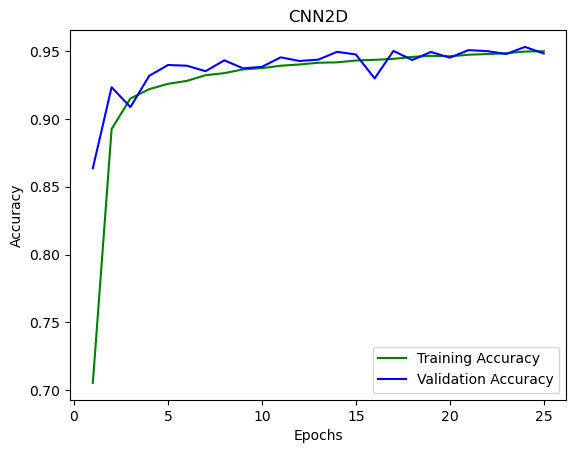

In [85]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 26)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
y_pred = cnn2d.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

370/370 [==============================] - 5s 11ms/step


In [87]:
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))


Testing Accuracy: 95.00

Precision: 95.67
Recall: 95.00
F1-score: 94.91



In [88]:
np.unique(y_test)

array([ 0.,  1.,  2.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       15., 16.])

In [89]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_classes, target_names=['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood'])

print(report)

                   precision    recall  f1-score   support

           Normal       0.99      0.98      0.98      3002
             DDoS       0.99      1.00      1.00      1000
              DoS       0.96      0.98      0.97      1000
MITM ARP Spoofing       0.76      0.98      0.85      1000
            Mirai       0.98      0.74      0.85       999
           Sparta       0.96      0.98      0.97      1000
            Theft       0.96      0.99      0.97      1000
           Attack       0.99      0.98      0.98       992
              C&C       0.76      0.89      0.82       195
     FileDownload       0.97      0.82      0.89       200
        HeartBeat       0.96      0.98      0.97       198
            Okiru       0.67      1.00      0.80         4
   Reconnaissance       0.99      0.93      0.96      1000
            Torii       1.00      0.17      0.30        52
            Flood       1.00      1.00      1.00       198

         accuracy                           0.95     1

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','DDoS','DoS','MITM ARP Spoofing','Mirai',
            'Sparta','Theft','Attack','C&C','FileDownload','HeartBeat','Okiru',
            'Reconnaissance','Torii','Flood']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.991047,2928.0,8806.0,32.0,74.0
1,DDoS,0.999155,998.0,10832.0,8.0,2.0
2,DoS,0.994679,980.0,10797.0,43.0,20.0
3,MITM ARP Spoofing,0.971706,983.0,10522.0,318.0,17.0
4,Mirai,0.977196,741.0,10829.0,12.0,258.0
5,Sparta,0.994932,977.0,10803.0,37.0,23.0
6,Theft,0.995608,992.0,10796.0,44.0,8.0
7,Attack,0.997297,973.0,10835.0,13.0,19.0
8,C&C,0.993497,173.0,11590.0,55.0,22.0
9,FileDownload,0.996622,165.0,11635.0,5.0,35.0


### Binary Classification

In [103]:
X = iot_ds_label.drop(['Label'], axis=1)
X.shape
y=iot_ds_label['Label']
y.shape

(59196,)

In [104]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [105]:
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
scaler.fit(X)
X_normalized = pd.DataFrame(scaler.transform(X), columns=X.columns)
X.update(X_normalized)

In [106]:
X[X==np.inf]=np.nan
X.fillna(0, inplace=True)

In [107]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [108]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

In [93]:
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)

X_val = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)

X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


# Training

In [109]:
from keras.models import load_model, Model

bi_cnn1 = load_model('CNN1D.h5')
bi_cnn1.layers.pop()
bi_cnn1.layers.pop()

bi_cnn1.add(Dense(256, activation='relu'))
bi_cnn1.add(Dense(units=2, activation='softmax'))

for layer in bi_cnn1.layers[:-2]:
    layer.trainable = False

bi_cnn1.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = bi_cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
            callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

Epoch 1/10
1110/1110 [==============================] - 38s 30ms/step - loss: 0.2347 - accuracy: 0.9374 - val_loss: 0.0692 - val_accuracy: 0.9900
Epoch 2/10
1110/1110 [==============================] - 22s 20ms/step - loss: 0.0595 - accuracy: 0.9875 - val_loss: 0.0438 - val_accuracy: 0.9902
Epoch 3/10
1110/1110 [==============================] - 20s 18ms/step - loss: 0.0456 - accuracy: 0.9890 - val_loss: 0.0385 - val_accuracy: 0.9905
Epoch 4/10
1110/1110 [==============================] - 20s 18ms/step - loss: 0.0414 - accuracy: 0.9901 - val_loss: 0.0359 - val_accuracy: 0.9905
Epoch 5/10
1110/1110 [==============================] - 24s 22ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 0.0338 - val_accuracy: 0.9907
Epoch 6/10
1110/1110 [==============================] - 35s 32ms/step - loss: 0.0360 - accuracy: 0.9906 - val_loss: 0.0321 - val_accuracy: 0.9904
Epoch 7/10
1110/1110 [==============================] - 28s 26ms/step - loss: 0.0346 - accuracy: 0.9907 - val_loss: 0.0311 -

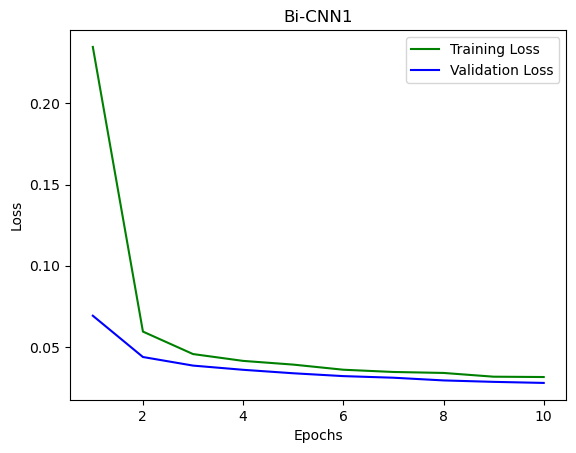

In [110]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

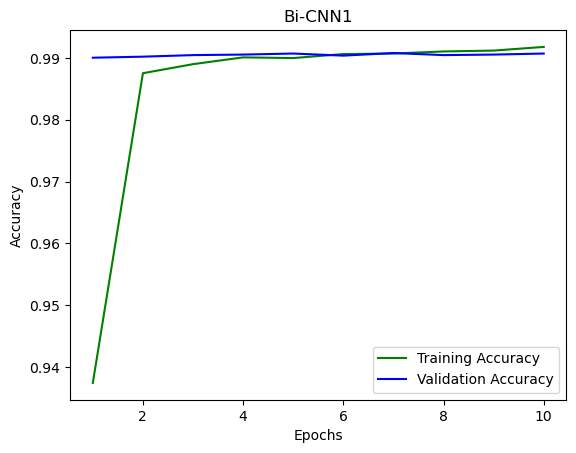

In [111]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 11)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Bi-CNN1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [112]:
y_pred = bi_cnn1.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))

370/370 [==============================] - 5s 13ms/step

Testing Accuracy: 99.21

Precision: 99.21
Recall: 99.21
F1-score: 99.21



In [113]:
report = classification_report(y_test, y_pred_classes, target_names=['Normal','Anamoly'])

print(report)

              precision    recall  f1-score   support

      Normal       0.98      0.97      0.98      1995
     Anamoly       0.99      1.00      1.00      9845

    accuracy                           0.99     11840
   macro avg       0.99      0.98      0.99     11840
weighted avg       0.99      0.99      0.99     11840



In [114]:
cm = confusion_matrix(y_test, y_pred_classes)
# print(cm)

num_classes = len(np.unique(y_test))
accuracy = np.zeros(num_classes)
tp = np.zeros(num_classes)
tn = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)

for i in range(num_classes):
    tp[i] = cm[i, i]
    tn[i] = np.sum(cm) - np.sum(cm[i, :]) - np.sum(cm[:, i]) + cm[i, i]
    fp[i] = np.sum(cm[:, i]) - cm[i, i]
    fn[i] = np.sum(cm[i, :]) - cm[i, i]
    accuracy[i] = (tp[i] + tn[i]) / np.sum(cm)
    
category = ['Normal','Anomaly']

model_test_scores = pd.DataFrame(list(zip(category,accuracy,tp,tn,fp,fn)), columns = ['Category', \
                                'Accuracy', 'TPR','TNR', 'FPR', 'FNR'])
display(model_test_scores)

,Category,Accuracy,TPR,TNR,FPR,FNR
0,Normal,0.992145,1942.0,9805.0,40.0,53.0
1,Anomaly,0.992145,9805.0,1942.0,53.0,40.0


In [120]:
bi_cnn1.save('Bi_CNN1D.h5')

C:\Users\missu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
